In [13]:
from pleiades.wipplsystems import BRB
from pleiades.grids import RectGrid
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# make R,Z grid from 0,1,101 -.5,.5,101
grid = RectGrid((0,1.75,101),(-1.75,1.75,101))
brb = BRB()
brb.trex.currents = 200,200
brb.ltrx.currents = 2000,1000

brb.grid = grid

In [14]:
R,Z = grid.R,grid.Z
psi = brb.psi
B = np.sqrt(brb.BR**2 + brb.BZ**2)

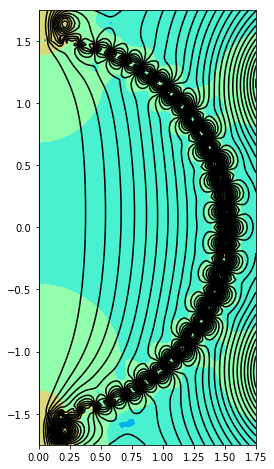

In [15]:
fig,ax = plt.subplots(figsize=(4,8))
ax.contourf(R,Z,B,101,cmap="rainbow",locator=ticker.LogLocator())
ax.contour(R,Z,psi,51,colors="k")
ax.set_aspect(1)
plt.show()